In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

#plotly library
#import plotly as py
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go


In [2]:
#Read in csv files
data = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [3]:
#Ensure data is read in correctly
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#Basic statistics of data
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
#Find non null objects
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
#Show top rows of regions to ensure it was read correctly
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
#Merge two csvs into one datafram
merged = pd.merge(data, regions, on='NOC', how='left')

In [8]:
#Show top rows of merged dataframe
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
#we found out how many teams in our data
print("Team Names in Dataset:")
print(merged.Team.unique())

print("\nYears in Dataset:")
#we sorted the years  for a better look view.
print(np.sort(merged.Year.unique()))

print("\nSport Types:")
print(merged.Sport.unique())

Team Names in Dataset:
['China' 'Denmark' 'Denmark/Sweden' ... 'Solos Carex' 'Dow Jones' 'Digby']

Years in Dataset:
[1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002
 2004 2006 2008 2010 2012 2014 2016]

Sport Types:
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby

In [10]:
#Sorted data from 1976 to present
year=merged[(merged['Year'] >= 1976)]
year.head(100)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN


In [11]:
#Filtered data to only include summer games
season=year[(year['Season'] == 'Summer')]
season.head(100)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,Finland,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
81,23,Fritz Aanes,M,22.0,187.0,89.0,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,Norway,NaN
82,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,Norway,NaN


In [12]:
#Show top rows to ensure filters were done correctly
final_data=season
final_data.head(100)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,Finland,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
81,23,Fritz Aanes,M,22.0,187.0,89.0,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,Norway,NaN
82,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,Norway,NaN


In [13]:
#Determine number of rows and columns
final_data.shape


(131554, 17)

In [14]:
#Show types and non null fields
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131554 entries, 0 to 271110
Data columns (total 17 columns):
ID        131554 non-null int64
Name      131554 non-null object
Sex       131554 non-null object
Age       130962 non-null float64
Height    125177 non-null float64
Weight    125009 non-null float64
Team      131554 non-null object
NOC       131554 non-null object
Games     131554 non-null object
Year      131554 non-null int64
Season    131554 non-null object
City      131554 non-null object
Sport     131554 non-null object
Event     131554 non-null object
Medal     19333 non-null object
region    131269 non-null object
notes     2310 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 18.1+ MB


In [15]:
#Let's learn about the int values in our dataset.

final_data.iloc[:,1:].describe()

,Age,Height,Weight,Year
count,130962.000000,125177.000000,125009.000000,131554.000000
mean,25.045593,175.938599,70.898387,1997.953601
std,5.593589,11.336042,15.470921,12.004387
min,11.000000,127.000000,25.000000,1976.000000
25%,21.000000,168.000000,60.000000,1988.000000
50%,24.000000,176.000000,70.000000,2000.000000
75%,28.000000,184.000000,80.000000,2008.000000
max,71.000000,226.000000,214.000000,2016.000000


In [16]:
#Write to csv
final_data.to_csv("Olympic_final_data.csv", encoding='utf-8', index=True)


In [17]:
data_gender=final_data['Sex'].value_counts()
data_gender.head()

M    83673
F    47881
Name: Sex, dtype: int64

In [18]:
#List comprehension shows average age, and add column of Age level to show young or old athlete
average_age=final_data.Age.mean()
print("Average Age:",average_age)
final_data["Age_Level"]=["Old" if item>average_age else "Young" for item in final_data.Age]
final_data.loc[:10,["Age_Level","Name","Age"]]

Average Age: 25.045593378231853


C:\Users\rothj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Age_Level,Name,Age
0,Young,A Dijiang,24.0
1,Young,A Lamusi,23.0


In [19]:
#Use Pandas to find all athletes under the age of 18 to win a gold medal
data_gold=final_data[np.logical_and(data['Age']<18,data['Medal']=="Gold")]
data_gold.head(15)

C:\Users\rothj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Age_Level
2005,1109,Lavinia Agache (-Carney),F,16.0,148.0,40.0,Romania,ROU,1984 Summer,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold,Romania,NaN,Young
4835,2762,Margarita Sergeyevna Aliychuk,F,17.0,174.0,48.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold,Russia,NaN,Young
5826,3281,Simona Amnar (-Tabr),F,16.0,158.0,44.0,Romania,ROU,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Horse Vault,Gold,Romania,NaN,Young
11788,6432,Celestine Boyd Jonto Hycieth Babayaro,M,17.0,173.0,66.0,Nigeria,NGR,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Gold,Nigeria,NaN,Young
12780,6955,Svetlana Nikolayevna Baitova,F,16.0,152.0,39.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Gymnastics,Gymnastics Women's Team All-Around,Gold,Russia,NaN,Young
13309,7223,Marta Bald Marn,F,17.0,165.0,40.0,Spain,ESP,1996 Summer,1996,Summer,Atlanta,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold,Spain,NaN,Young
16849,9034,Amanda Ray Beard (-Brown),F,14.0,173.0,59.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Gold,USA,NaN,Young
19192,10160,Brooke Marie Bennett (-Frioud),F,16.0,165.0,57.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 800 metres Freestyle,Gold,USA,NaN,Young
23763,12485,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold,Romania,NaN,Young
24339,12762,Svetlana Leonidovna Boginskaya,F,15.0,157.0,44.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Gymnastics,Gymnastics Women's Team All-Around,Gold,Russia,NaN,Young


In [20]:
#Show all athletes from a given country
data_team=final_data['Team']=="China"
final_data[data_team].head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Age_Level
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,Young
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,Young
1072,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN,Young
2611,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN,Young
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,Young
2613,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,Young
6437,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN,Young
6438,3611,An Zhongxin,F,27.0,170.0,65.0,China,CHN,2000 Summer,2000,Summer,Sydney,Softball,Softball Women's Softball,NaN,China,NaN,Old
8423,4639,Ao Changrong,M,25.0,173.0,71.0,China,CHN,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,NaN,China,NaN,Young
8425,4641,Ao Tegen,M,21.0,181.0,90.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Judo,Judo Men's Middleweight,NaN,China,NaN,Young


In [21]:
#Show row by row of athletes from a country to win a certain medal
data_first=final_data[np.logical_and(final_data['Team']=="China",final_data['Medal']=="Gold")]
for index,value in data_first[0:1].iterrows():
    print(index,"1,:",value)


33529 1,: ID                                         17294
Name                                   Cai Yalin
Sex                                            M
Age                                           23
Height                                       174
Weight                                        60
Team                                       China
NOC                                          CHN
Games                                2000 Summer
Year                                        2000
Season                                    Summer
City                                      Sydney
Sport                                   Shooting
Event        Shooting Men's Air Rifle, 10 metres
Medal                                       Gold
region                                     China
notes                                        NaN
Age_Level                                  Young
Name: 33529, dtype: object


In [22]:
#default function to find gold medalists
def find(year,sport,Medal="Gold"):
    """
    parameter: Year,Sport type
    return: Athletes who receive a gold medal according to the sport type and the year.
    """
    data_find=data[(data['Year']==year) & (data['Sport']==sport) & (data['Medal']==Medal)]
    return data_find
find(1992,"Basketball")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
14220,7674,Yelena Viktorovna Baranova,F,20.0,192.0,80.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Gold
14656,7901,Charles Wade Barkley,M,29.0,198.0,114.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
22150,11668,Larry Joe Bird,M,35.0,205.0,100.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
31954,16417,Elen Rafaelovna Bunatyants-Shakirova,F,22.0,190.0,86.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Gold
58646,30009,Clyde Austin Drexler,M,30.0,200.0,101.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
65566,33553,Patrick Aloysius Ewing,M,29.0,213.0,109.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
78340,39767,Irina Yakovlevna Gerlits,F,26.0,190.0,72.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Gold
109625,55424,"Earvin ""Magic"" Johnson, Jr.",M,32.0,205.0,100.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
110517,55881,Michael Jeffrey Jordan,M,29.0,198.0,90.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
117541,59486,Yelena Anatolyevna Khudashova,F,27.0,195.0,78.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Gold


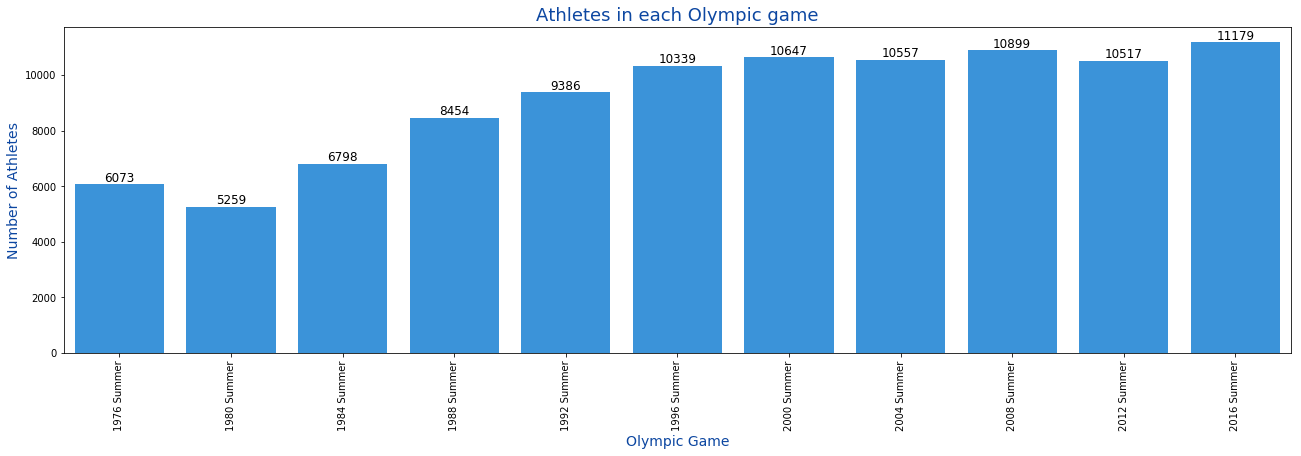

In [23]:
#Determine number of ahtletes in a given year on a bar graph
games_athletes = final_data.pivot_table(final_data, index=['Games'], aggfunc=lambda x: len(x.unique())).reset_index()[['Games','ID']]
fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Games', y='ID', data=games_athletes, ax=ax, color="#2196F3")
a.set_xticklabels(labels=games_athletes['Games'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes in each Olympic game', size=18, color="#0D47A1")

plt.show()

In [24]:
#If an athlete did not win a medal, fill in "None"
for x in final_data.columns:
    if final_data[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x,final_data[x].isnull().values.ravel().sum()))

final_data['Medal'] = final_data['Medal'].fillna('None')

Age - 592
Height - 6377
Weight - 6545
Medal - 112221
region - 285
notes - 129244


C:\Users\rothj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [25]:
#Show top rows to ensure None is working correctly
final_data.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Age_Level
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China,NaN,Young
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China,NaN,Young
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,None,Finland,NaN,Old
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,None,Finland,NaN,Old
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,None,Finland,NaN,Old
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,None,Finland,NaN,Old
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN,Old
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,None,Romania,NaN,Young
81,23,Fritz Aanes,M,22.0,187.0,89.0,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",None,Norway,NaN,Young
82,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",None,Norway,NaN,Old


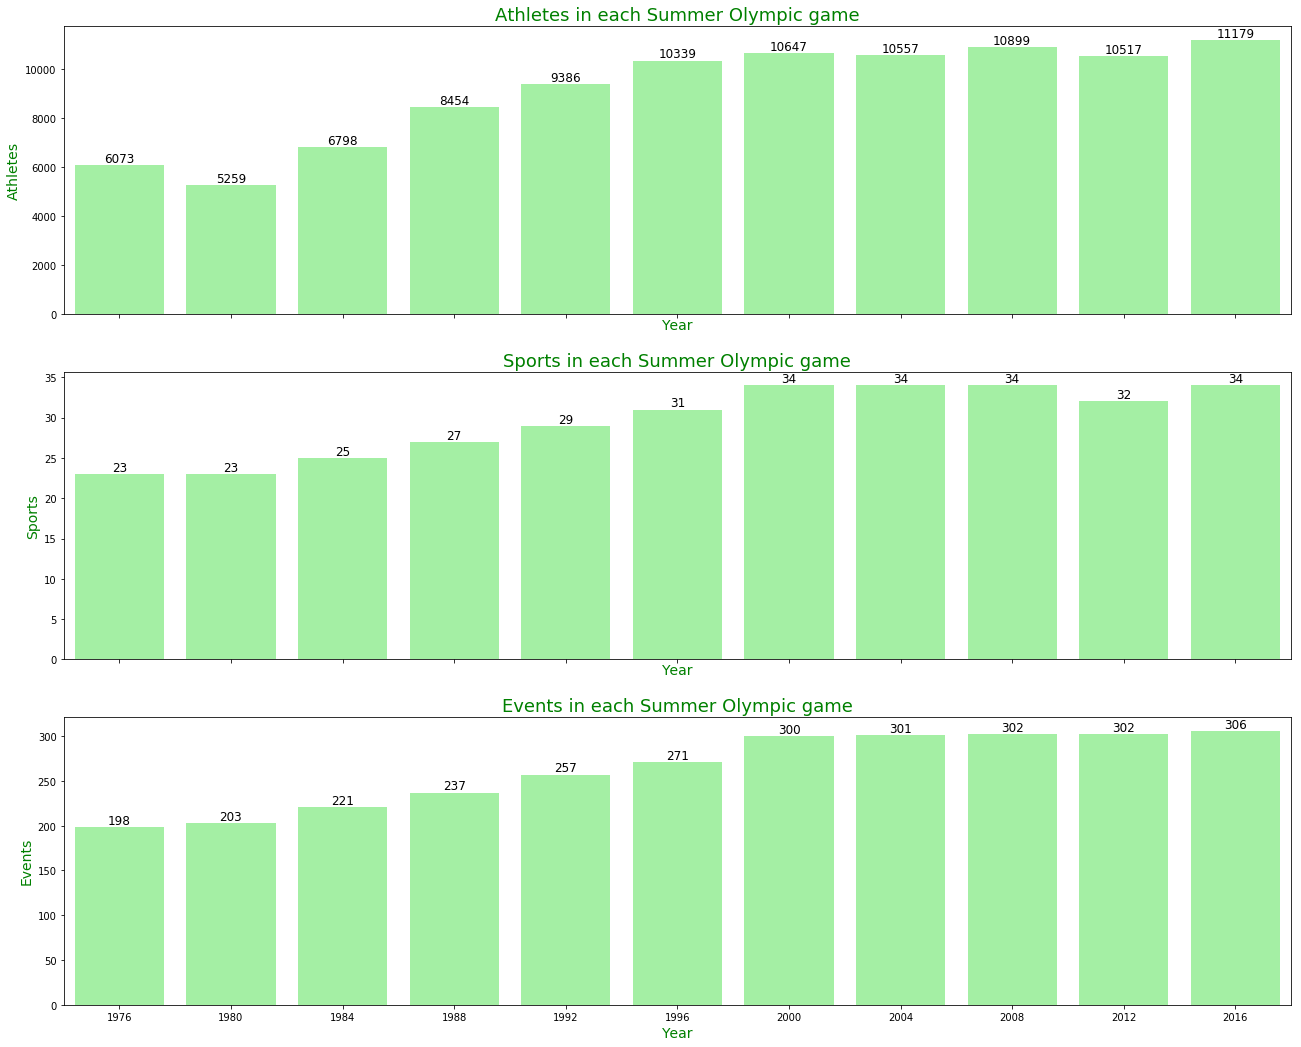

In [26]:
#Show athletes, sports, and events over time
summer = final_data[final_data['Season']=='Summer']

summer_athletes = summer.pivot_table(summer, index=['Year'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','ID']]
summer_sports = summer.groupby('Year')['Sport'].nunique().reset_index()
summer_events = summer.groupby('Year')['Event'].nunique().reset_index()

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(22,18))

sns.barplot(x='Year', y='ID', data=summer_athletes, ax=ax[0], color="palegreen")
sns.barplot(x='Year', y='Sport', data=summer_sports, ax=ax[1], color="palegreen")
sns.barplot(x='Year', y='Event', data=summer_events, ax=ax[2], color="palegreen")

j = 0
for i in ['Athletes', 'Sports', 'Events']:
    ax[j].set_xlabel('Year', size=14, color="green")
    ax[j].set_ylabel(i, size=14, color="green")
    ax[j].set_title(i + ' in each Summer Olympic game', size=18, color="green")
    j = j + 1
    
for i in range(3):
    for p in ax[i].patches:
        ax[i].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=12, color='black', ha='center', va='bottom')
plt.show()

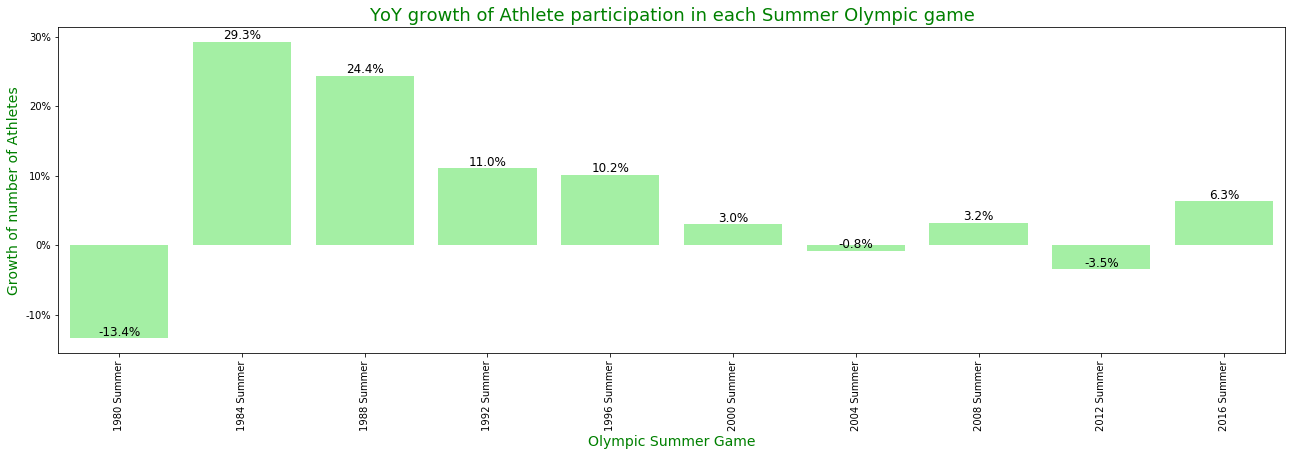

In [27]:
#Show year over year growth for the given time period
summer_games_athletes = summer[summer['Season']=='Summer'].pivot_table(summer, index=['Games'], 
                                                                         aggfunc=lambda x: len(x.unique())).reset_index()[['Games','ID']]
summer_games_athletes['ID1'] = summer_games_athletes['ID'].shift(1)
summer_games_athletes['Growth'] = ((summer_games_athletes['ID']-summer_games_athletes['ID1']))/summer_games_athletes['ID1']
summer_games_athletes.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Games', y='Growth', data=summer_games_athletes, ax=ax, color="palegreen")
a.set_xticklabels(labels=summer_games_athletes['Games'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '{:,.1%}'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Summer Game', size=14, color="green")
ax.set_ylabel('Growth of number of Athletes', size=14, color="green")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
ax.set_title('YoY growth of Athlete participation in each Summer Olympic game', size=18, color="green")

plt.show()

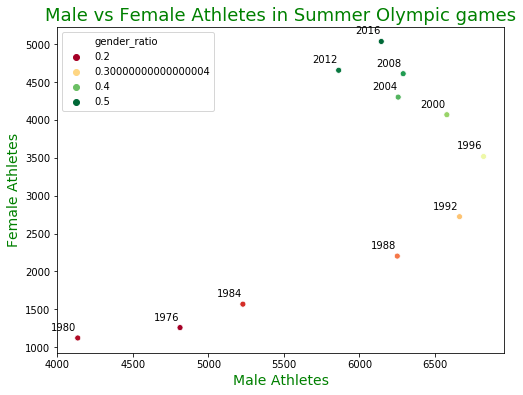

In [28]:
#Determine male to female ratio over time
game_sex = final_data[final_data['Season']=='Summer'].pivot_table(final_data, index=['Year','Sex'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','Sex','ID']]
game_sex = game_sex.pivot_table(game_sex, index=['Year'], columns='Sex', aggfunc=sum).reset_index()
game_sex.columns = ['Year','F','M']
game_sex.fillna(0,inplace=True)
game_sex['gender_ratio'] = game_sex['F'] / (game_sex['F'] + game_sex['M'])

fig, ax = plt.subplots(figsize=(8,6))
a = sns.scatterplot(x="M", y="F", hue="gender_ratio", palette='RdYlGn', data=game_sex, ax=ax)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-175, point['y']+100, '{0:.0f}'.format(point['val']))

label_point(game_sex['M'],game_sex['F'],game_sex['Year'],ax)
        
ax.set_xlabel('Male Athletes', size=14, color="green")
ax.set_ylabel('Female Athletes', size=14, color="green")
ax.set_title('Male vs Female Athletes in Summer Olympic games', size=18, color="green")
plt.show()

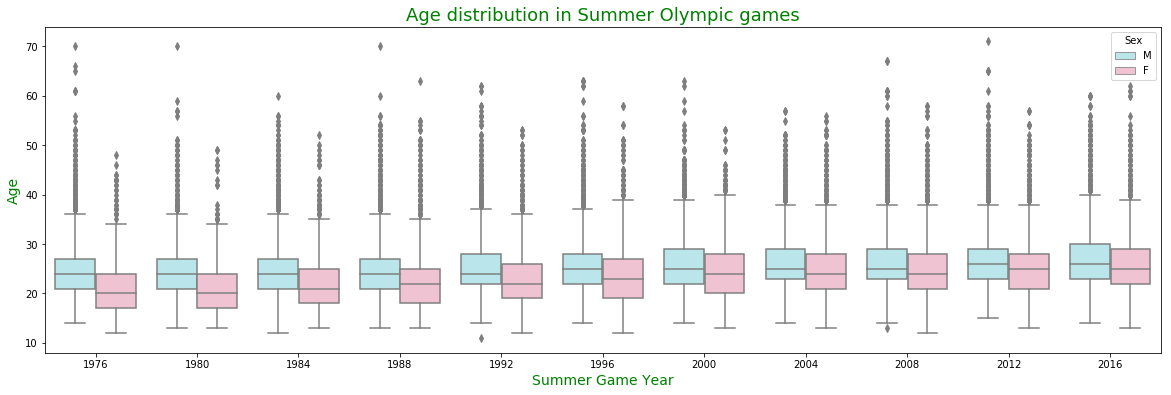

In [29]:
#Visualize age distribution on a box plot for males and females
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year", y="Age", hue="Sex", palette={"M": "#B2EBF2", "F":"#F8BBD0"}, data=final_data[final_data['Season']=='Summer'], ax=ax)
        
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Age', size=14, color="green")
ax.set_title('Age distribution in Summer Olympic games', size=18, color="green")
plt.show()

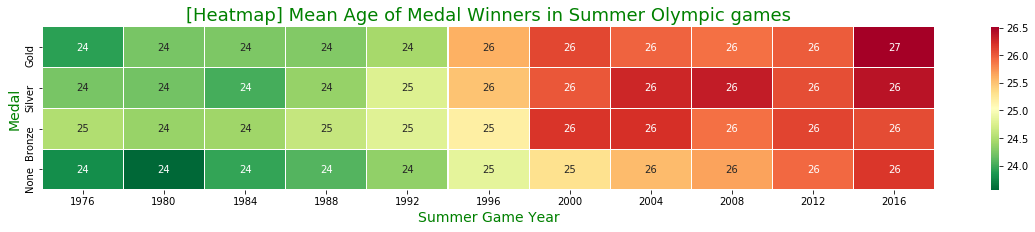

In [30]:
#Heatmap for average age of medal winners over time
year_sport_age = final_data[final_data['Season']=='Summer'].pivot_table(final_data, index=['Year','Medal'], aggfunc=np.mean).reset_index()[['Year','Medal','Age']]
year_sport_age = year_sport_age.pivot("Medal", "Year", "Age")
year_sport_age = year_sport_age.reindex(["Gold","Silver","Bronze","None"])
f, ax = plt.subplots(figsize=(20, 3))
sns.heatmap(year_sport_age, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn_r")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Medal', size=14, color="green")
ax.set_title('[Heatmap] Mean Age of Medal Winners in Summer Olympic games', size=18, color="green")
plt.show()

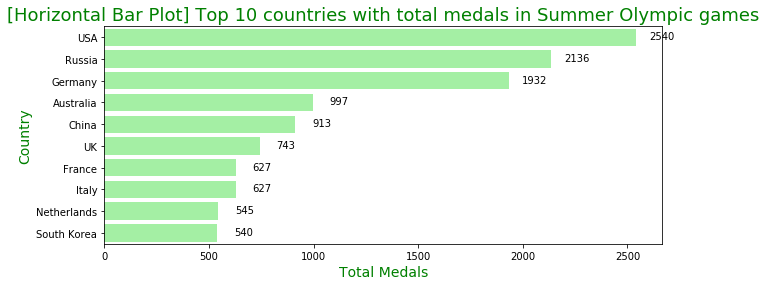

In [31]:
#Find total top 10 winners of medals since given time period
t10_summer = final_data[(final_data['Season']=='Summer') & (final_data['Medal']!='None')].groupby('region').count().reset_index()[['region','Medal']].sort_values('Medal', ascending=False).head(10)
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x="Medal", y="region", data=t10_summer, label="region", color="palegreen")

for p in ax.patches:
    ax.text(p.get_width() + 125,
            p.get_y() + (p.get_height()/2) + .1,
            '{:1.0f}'.format(p.get_width()),
            ha="center")

ax.set_xlabel('Total Medals', size=14, color="green")
ax.set_ylabel('Country', size=14, color="green")
ax.set_title('[Horizontal Bar Plot] Top 10 countries with total medals in Summer Olympic games', size=18, color="green")
plt.show()

In [32]:
#Mege final data with get dummies for each athlete.  1 if they won gold, silver, or bronze.  1 goes in none if they did not win a medal
final_data = pd.concat([final_data, pd.get_dummies(final_data['Medal'])], axis=1); final_data
#final_data=pd.get_dummies(final_data['Medal'])
#final_data.head(100)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,notes,Age_Level,Bronze,Gold,None,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Basketball,Basketball Men's Basketball,None,China,NaN,Young,0,0,1,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,Judo,Judo Men's Extra-Lightweight,None,China,NaN,Young,0,0,1,0
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,...,Badminton,Badminton Men's Singles,None,Finland,NaN,Old,0,0,1,0
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,...,Sailing,Sailing Women's Windsurfer,None,Finland,NaN,Old,0,0,1,0
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,...,Sailing,Sailing Women's Windsurfer,None,Finland,NaN,Old,0,0,1,0
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,...,Athletics,Athletics Men's Shot Put,None,Finland,NaN,Old,0,0,1,0
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,...,Handball,Handball Women's Handball,Gold,Norway,NaN,Old,0,1,0,0
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,...,Weightlifting,Weightlifting Women's Super-Heavyweight,None,Romania,NaN,Young,0,0,1,0
81,23,Fritz Aanes,M,22.0,187.0,89.0,Norway,NOR,2000 Summer,2000,...,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",None,Norway,NaN,Young,0,0,1,0
82,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004 Summer,2004,...,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",None,Norway,NaN,Old,0,0,1,0


In [33]:
#Write this file to a csv
final_data.to_csv("Olympic_final_data2.csv", encoding='utf-8', index=True)

In [34]:
#Aggregate data for each country to calucalte number of athletes to win gold, sivler, bronze etc
agg_data=final_data.groupby(['Year', 'Team', 'Bronze', 'Gold', 'None', 'Silver']).size().reset_index(name='Counts')
agg_data.head(200)

,Year,Team,Bronze,Gold,None,Silver,Counts
0,1976,Andorra,0,0,1,0,3
1,1976,Antigua and Barbuda,0,0,1,0,17
2,1976,Argentina,0,0,1,0,106
3,1976,Australia,0,0,0,1,15
4,1976,Australia,0,0,1,0,251
5,1976,Australia,1,0,0,0,8
6,1976,Austria,0,0,1,0,72
7,1976,Austria,1,0,0,0,1
8,1976,Bahamas,0,0,1,0,19
9,1976,Barbados,0,0,1,0,17


In [35]:
#Write this to csv
agg_data.to_csv("agg_data.csv", encoding='utf-8', index=True)

In [36]:
# total medal count by games and country
df     = final_data.groupby(['Games','NOC','Team','Event'])['Gold','Silver','Bronze'].sum()
df     = df.clip(upper=1)
df     = df.groupby(['Games','NOC','Team']).sum()
medals = df.merge(df, left_index=True, right_index=True)
df.head(100)

Gold  Silver  Bronze
Games       NOC Team                                      
1976 Summer AHO Netherlands Antilles     0       0       0
            AND Andorra                  0       0       0
            ANT Antigua and Barbuda      0       0       0
            ARG Argentina                0       0       0
            AUS Australia                0       1       4
            AUT Austria                  0       0       1
            BAH Bahamas                  0       0       0
            BAR Barbados                 0       0       0
            BEL Belgium                  0       3       3
            BER Bermuda                  0       0       1
            BIZ Belize                   0       0       0
            BOL Bolivia                  0       0       0
            BRA Brazil                   0       0       2
            BUL Bulgaria                 6       9       7
            CAN Canada                   0       5       6
            CAY Cayman Islands           0       0       0
            CHI Chile                    0       0       0
            CIV Cote d'Ivoire            0       0       0
            CMR Cameroon                 0       0       0
            COL Colombia                 0       0       0
            CRC Costa Rica               0       0       0
            CUB Cuba                     6       4       3
            DEN Denmark                  1       0       2
            DOM Dominican Republic       0       0       0
            ECU Ecuador                  0       0       0
            EGY Egypt                    0       0       0
            ESP Spain                    0       2       0
            FIJ Fiji                     0       0       0
            FIN Finland                  4       2       0
            FRA France                   2       3       4
...                                    ...     ...     ...
            PNG Papua New Guinea         0       0       0
            POL Poland                   7       6      13
            POR Portugal                 0       2       0
            PRK North Korea              1       1       0
            PUR Puerto Rico              0       0       1
            ROU Romania                  4       9      14
            SEN Senegal                  0       0       0
            SGP Singapore                0       0       0
            SMR San Marino               0       0       0
            SUI Switzerland              1       1       2
            SUR Suriname                 0       0       0
            SWE Sweden                   4       1       0
            TCH Czechoslovakia           2       2       4
            THA Thailand                 0       0       1
            TTO Trinidad and Tobago      1       0       0
            TUN Tunisia                  0       0       0
            TUR Turkey                   0       0       0
            URS Soviet Union            49      41      35
            URU Uruguay                  0       0       0
            USA United States           34      35      25
            VEN Venezuela                0       1       0
            YUG Yugoslavia               2       3       3
1980 Summer AFG Afghanistan              0       0       0
            ALG Algeria                  0       0       0
            AND Andorra                  0       0       0
            ANG Angola                   0       0       0
            AUS Australia                2       2       5
            AUT Austria                  1       2       1
            BEL Belgium                  1       0       0
            BEN Benin                    0       0       0

[100 rows x 3 columns]

In [37]:

# Total number of unique athletes
unique_athletes = pd.DataFrame(
    final_data.groupby(['Name','NOC','Team'])['Medal'].count())['Medal'].value_counts().sum()
print(unique_athletes)

# Distribution of number of medals won by an individual athlete
medal_distribution            = pd.DataFrame(pd.DataFrame(
   final_data.groupby(['Name','NOC','Team'])['Medal'].count())['Medal'].value_counts())
medal_distribution.index.name = 'All-Time Olympic Medals Won'
medal_distribution            = medal_distribution.rename(columns={'Medal': 'Names'})

# Percent distribution of number of medals won by an individual athlete
medal_distribution['Percentage of Athletes'] = medal_distribution['Names']/unique_athletes * 100
medal_distribution['Percentage of Athletes'] = medal_distribution['Percentage of Athletes'].round(3)
medal_distribution['Percentile'] = medal_distribution['Percentage of Athletes'].cumsum()
medal_distribution


72407


,Names,Percentage of Athletes,Percentile
All-Time Olympic Medals Won,,,
1,44169,61.001,61.001
2,16141,22.292,83.293
3,5422,7.488,90.781
4,2696,3.723,94.504
5,1326,1.831,96.335
6,1099,1.518,97.853
8,475,0.656,98.509
7,442,0.610,99.119
9,141,0.195,99.314
